In [8]:
import pandas as pd
import numpy as np
import gensim
import utils
%matplotlib inline
import re  # For preprocessing
import seaborn as sns
import warnings
import xgboost as xgb
from sklearn.manifold import TSNE
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from collections import defaultdict  # For word frequency
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [9]:
path='C:\\Users\\jyoti\\Desktop\\NLP\\NLP_project\\NLP-project-\\'
df=pd.read_csv(path + 'Dataset\\3.csv')

## Skipgram

In [10]:
tokenized_caption = df['caption'].apply(lambda x: str(x).split()) # tokenizing 
model_w2v_caption = gensim.models.Word2Vec(tokenized_caption,
        size=250, # desired no. of features/independent variables
        window=5, # context window size
        min_count=2, # Ignores all words with total frequency lower than 2.                                  
        sg = 0, # 0 for CBOW model
        hs = 0,
        negative = 10, # for negative sampling
        workers= 32 # no.of cores
        )
model_w2v_caption.train(tokenized_caption, total_examples= len(df['caption']), epochs=20)
model_w2v_caption.save(path + "Save Models\\200_Word2vec_CBOW_Captions.model")


In [11]:
def word_vector(tokens, size,model):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

In [12]:
wordvec_arrays = np.zeros((len(tokenized_caption), 250)) 
for i in range(len(tokenized_caption)):
    wordvec_arrays[i,:] = word_vector(tokenized_caption[i], 250,model_w2v_caption)
w2v_df_cap = pd.DataFrame(wordvec_arrays)
w2v_df_cap.shape

C:\Users\jyoti\anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(26800, 250)

## hashtags

In [13]:
tokenized_hash = df['hashtags'].apply(lambda x: str(x).split()) # tokenizing 
model_w2v_hashtag = gensim.models.Word2Vec(tokenized_hash,
            size=250, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2, # Ignores all words with total frequency lower than 2.                                  
            sg = 0, # 0 for CBOW model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 32 # no.of cores
)
model_w2v_hashtag.train(tokenized_hash, total_examples= len(df['hashtags']), epochs=20)
model_w2v_hashtag.save(path + "Save Models\\200_Word2vec_CBOW_Hashtag.model")

In [14]:
wordvec_arrays_hash = np.zeros((len(tokenized_hash), 250)) 
for i in range(len(tokenized_hash)):
    wordvec_arrays_hash[i,:] = word_vector(tokenized_hash[i], 250,model_w2v_hashtag)
w2v_df_hash = pd.DataFrame(wordvec_arrays_hash)
w2v_df_hash.shape

C:\Users\jyoti\anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(26800, 250)

## mentions

In [15]:
tokenized_ment = df['mentions'].apply(lambda x: str(x).split()) # tokenizing 
model_w2v_mentions = gensim.models.Word2Vec(tokenized_ment,
            size=250, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2, # Ignores all words with total frequency lower than 2.                                  
            sg = 0, # 0 for CBOW model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 32 # no.of cores
)
model_w2v_mentions.train(tokenized_ment, total_examples= len(df['mentions']), epochs=20)
model_w2v_mentions.save(path + "Save Models\\200_Word2vec_CBOW_Mentions.model")

In [16]:
wordvec_arrays_ment = np.zeros((len(tokenized_ment), 250)) 
for i in range(len(tokenized_caption)):
    wordvec_arrays_ment[i,:] = word_vector(tokenized_ment[i], 250,model_w2v_mentions)
w2v_dF_ment = pd.DataFrame(wordvec_arrays_ment)
w2v_dF_ment.shape

C:\Users\jyoti\anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(26800, 250)

In [17]:
w2v_Df = pd.DataFrame(np.hstack((w2v_df_cap,w2v_df_hash,w2v_dF_ment, df)))

In [18]:
w2v_Df

,0,1,2,3,4,5,6,7,8,9,...,763,764,765,766,767,768,769,770,771,772
0,0.00439545,-0.12913,-0.0374617,0.205436,-0.173239,0.0076793,-0.14432,-0.340496,0.18614,0.114388,...,0,0,0,"'#edinburghfoodies', '#edinburghrestaurants', ...",25,NaN,0,[],NaN,0
1,0.142143,-0.143687,-0.660801,0.6973,-0.365703,0.682802,0.007249,-0.202832,0.412837,0.0367536,...,0,0.333333,0.25,"'#michelin', '#michelinstar', '#michelinuk', '...",28,NaN,0,[],NaN,0
2,-0.189741,0.421564,0.11837,-0.122356,-0.333564,0.266576,-0.419754,-0.0732339,-0.140834,-0.123965,...,0,0.333333,0.166667,"'#michelin', '#michelinstar', '#michelinuk', '...",28,"'@castlegamescotland', '@wellocksfood'",2,[],NaN,0
3,0.255843,0.132497,-0.0899331,0.432786,-0.504334,0.0695279,-0.297507,0.0594728,0.079824,-0.127429,...,0,0,0,"'#michelin', '#michelinstar', '#michelinuk', '...",30,NaN,0,[],NaN,0
4,-0.0592419,-0.154969,0.728846,0.142264,0.470105,-0.110693,-0.203419,0.490536,-0.0536334,-0.0133245,...,0,0.791667,-0.0416667,NaN,0,"'@_mark_donald', '@theglenturretlalique', '@ca...",11,[],NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26795,0.172265,0.0843257,0.383992,0.0743185,0.0818411,-0.0482056,-0.0621091,0.343078,-0.185996,-0.138426,...,0,0.506629,0.42803,"'#lookingforward', '#theatreland', '#performin...",6,"'@evening', '@tiktok', '@nationalyouththeatre'...",4,[],NaN,0
26796,0.108927,0.0965655,0.362892,0.118066,0.198046,0.181331,-0.0198926,0.242245,-0.214866,-0.164048,...,0,0.416667,0.491667,"'#lookingforward', '#travelinspiration', '#lov...",7,'@youmustgoblog',1,['🍾'],'bottle with popping cork',1
26797,0.298929,0.337038,0.0474096,0.608272,0.18404,0.0849446,0.225468,0.500826,-0.283737,-0.358719,...,0,0.510417,0.260417,"'#lookingforward', '#londonviews', '#prettycit...",8,'@damienhewetson',1,[],NaN,0
26798,0.192111,0.379986,0.13816,0.0284994,0.196532,-0.180385,0.0535329,0.349081,-0.3675,-0.384464,...,0,0.708333,0.445833,"'#lookingforward', '#travelinspo', '#datenight...",7,NaN,0,[],NaN,0


In [19]:
dropped = [751,766,768,770,771]
w2v_df = w2v_Df.drop(dropped,axis=1)
w2v_df

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,767,769,772
0,0.00439545,-0.12913,-0.0374617,0.205436,-0.173239,0.0076793,-0.14432,-0.340496,0.18614,0.114388,...,0,0,0,1,0,0,0,25,0,0
1,0.142143,-0.143687,-0.660801,0.6973,-0.365703,0.682802,0.007249,-0.202832,0.412837,0.0367536,...,0,0,0,0,0,0.333333,0.25,28,0,0
2,-0.189741,0.421564,0.11837,-0.122356,-0.333564,0.266576,-0.419754,-0.0732339,-0.140834,-0.123965,...,1,0,0,0,0,0.333333,0.166667,28,2,0
3,0.255843,0.132497,-0.0899331,0.432786,-0.504334,0.0695279,-0.297507,0.0594728,0.079824,-0.127429,...,0,0,0,0,0,0,0,30,0,0
4,-0.0592419,-0.154969,0.728846,0.142264,0.470105,-0.110693,-0.203419,0.490536,-0.0536334,-0.0133245,...,0,0,1,0,0,0.791667,-0.0416667,0,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26795,0.172265,0.0843257,0.383992,0.0743185,0.0818411,-0.0482056,-0.0621091,0.343078,-0.185996,-0.138426,...,0,0,1,0,0,0.506629,0.42803,6,4,0
26796,0.108927,0.0965655,0.362892,0.118066,0.198046,0.181331,-0.0198926,0.242245,-0.214866,-0.164048,...,1,0,0,0,0,0.416667,0.491667,7,1,1
26797,0.298929,0.337038,0.0474096,0.608272,0.18404,0.0849446,0.225468,0.500826,-0.283737,-0.358719,...,0,0,0,0,0,0.510417,0.260417,8,1,0
26798,0.192111,0.379986,0.13816,0.0284994,0.196532,-0.180385,0.0535329,0.349081,-0.3675,-0.384464,...,1,0,0,0,0,0.708333,0.445833,7,0,0


In [20]:
w2v_df = pd.DataFrame(w2v_df)
data=w2v_df.astype(str)

normalizer = preprocessing.MinMaxScaler(feature_range=(0, 1))
w2v_df = pd.DataFrame(normalizer.fit_transform(data),  columns = data.columns)

In [21]:
y=w2v_df.iloc[ :, -1:]  #Target Variable          
X=w2v_df.iloc[: , :-1]  #Feature Matrix 

X=pd.DataFrame(X)
y=pd.DataFrame(y)
for i in X.columns:
  X[i]=pd.to_numeric(X[i])
for i in y.columns:
  y[i]=pd.to_numeric(y[i])


x_train_w2v_df, x_test_w2v_df, y_train_w2v_df, y_test_w2v_df = train_test_split(X, y, test_size=0.2,random_state=2022)

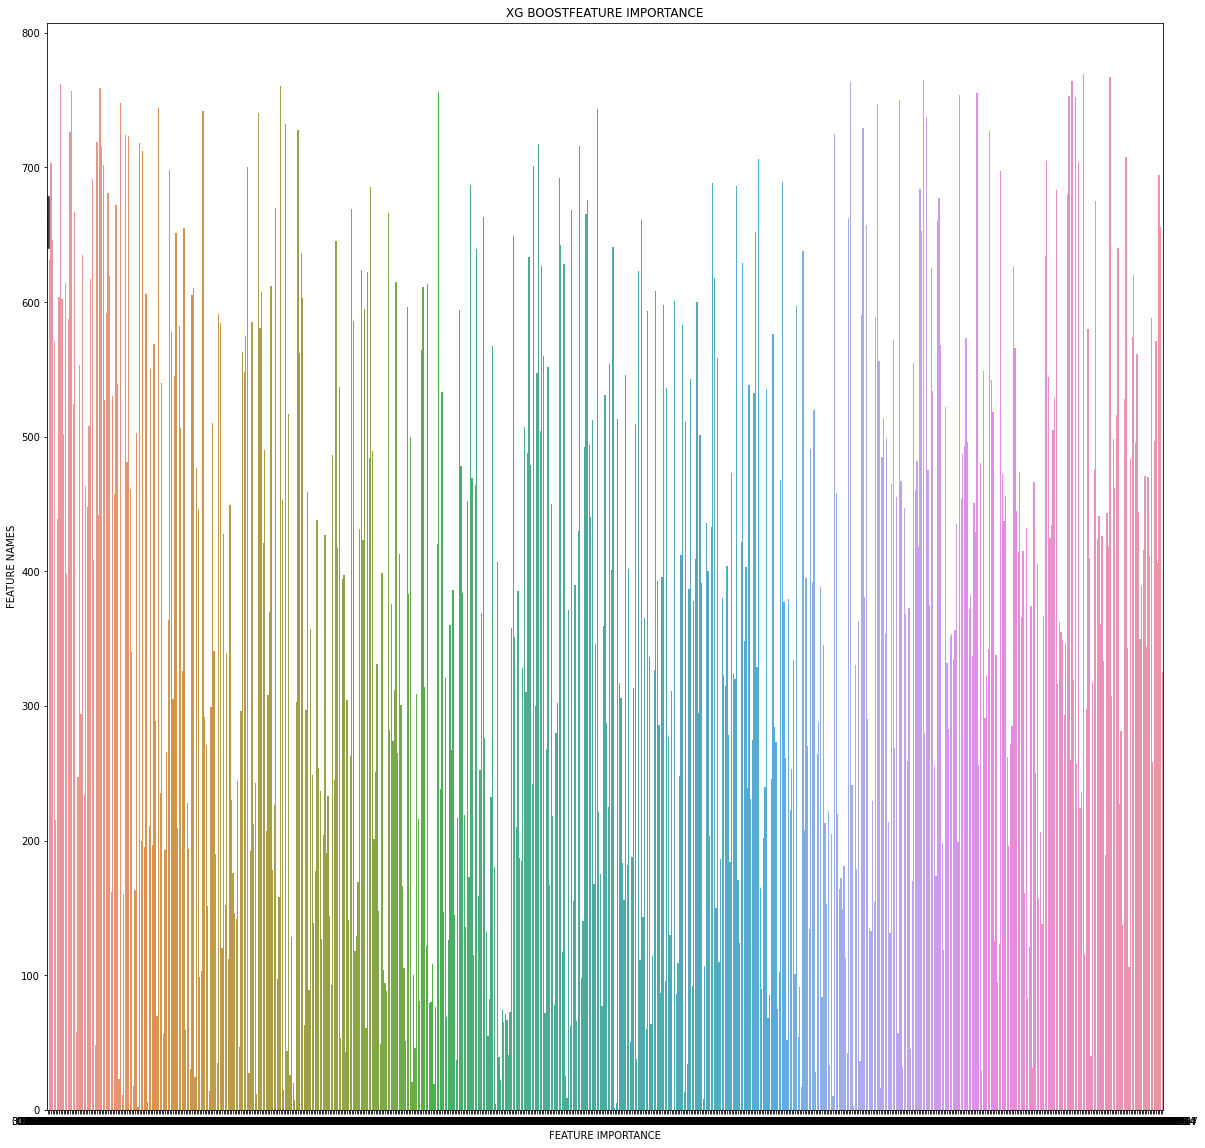

In [22]:
# utils.hyperparameterTuning_XGBoost(x_train_w2v_df,y_train_w2v_df)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7, learning_rate = 0.03,max_depth = 5, min_child_weight=4,nthread = 4, n_estimators = 500,subsample=0.7)
xg_reg.fit(x_train_w2v_df, y_train_w2v_df)
y_pred = xg_reg.predict(x_test_w2v_df)
utils.plot_feature_importance(xg_reg.feature_importances_,x_train_w2v_df.columns,'XG BOOST')

In [23]:
utils.metrics(y_test_w2v_df,y_pred)

RMSE: 0.043198

R2 Score: 0.317784

MAE : 0.025740

MSE : 0.001866

RMSLE : -3.141961

max_error : 0.834518



C:\Users\jyoti\anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RMSE: 0.047544

R2 Score: 0.173598

MAE : 0.029397

MSE : 0.002260

RMSLE : -3.046093

max_error : 0.830099



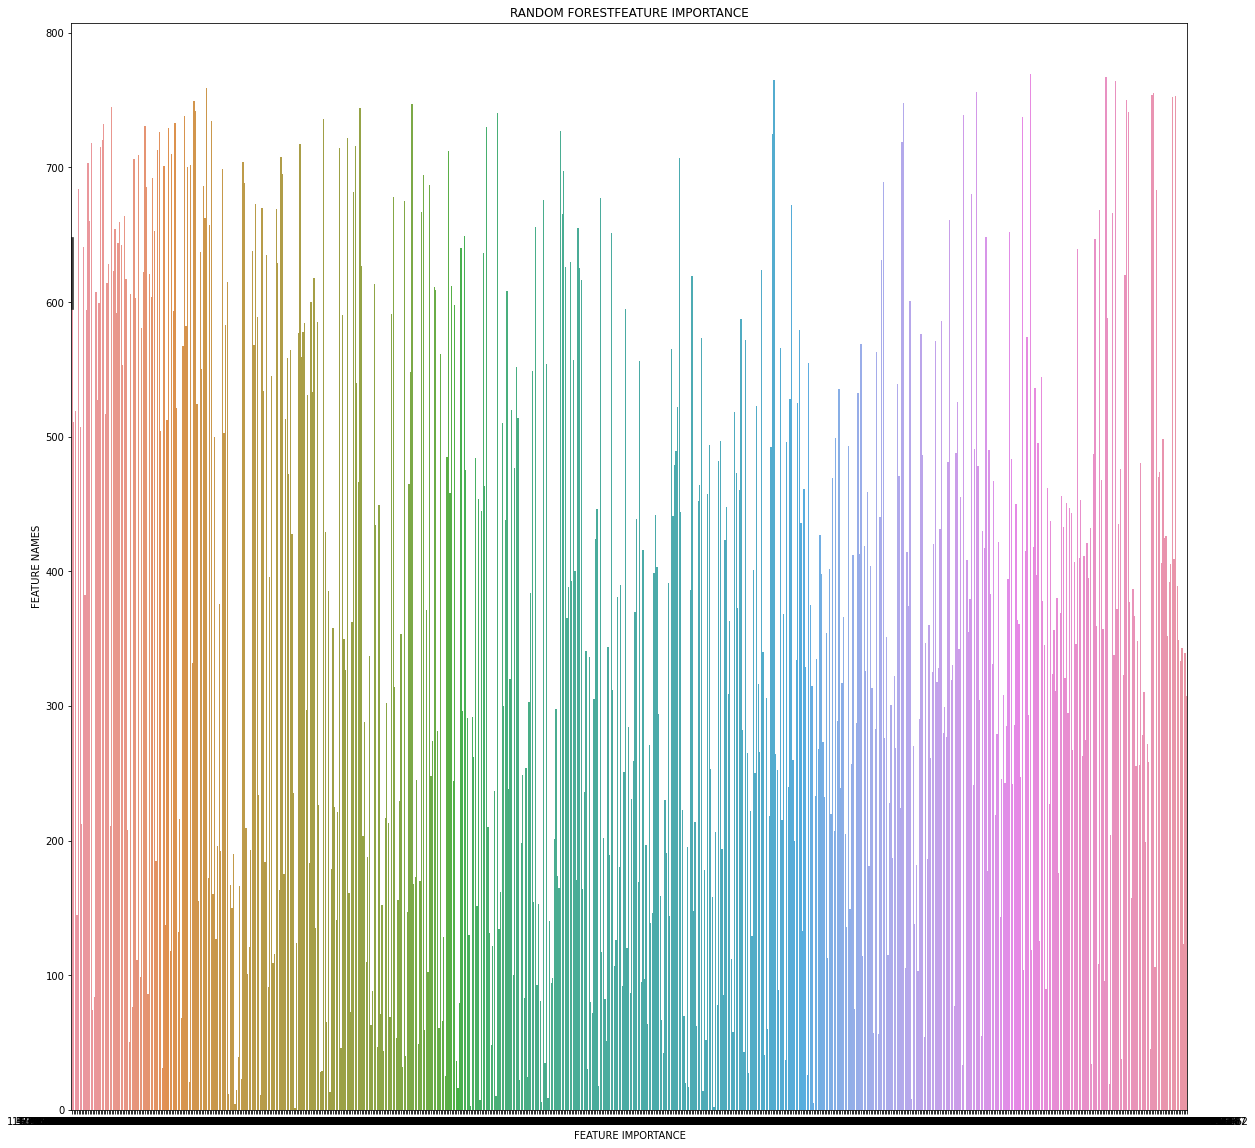

In [24]:
# utils.hyperparameterTuning_RandomForest(x_train_w2v_df,y_train_w2v_df)
rnd_clf = RandomForestRegressor(n_estimators=20, min_samples_split=10, min_samples_leaf=4,max_features='sqrt',max_depth=10,bootstrap=True)
rnd_clf.fit(x_train_w2v_df, y_train_w2v_df)
y_pred_w2v_df = rnd_clf.predict(x_test_w2v_df)
utils.metrics(y_test_w2v_df,y_pred_w2v_df)
utils.plot_feature_importance(rnd_clf.feature_importances_,x_train_w2v_df.columns,'RANDOM FOREST')

In [25]:
utils.metrics(y_test_w2v_df,y_pred_w2v_df)

RMSE: 0.047544

R2 Score: 0.173598

MAE : 0.029397

MSE : 0.002260

RMSLE : -3.046093

max_error : 0.830099

